In [10]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import scipy
from scipy import stats
from scipy import stats
import sklearn
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
#import skbio.stats.composition as comp
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import svm # SVC para classificação (target discreto) e SVR para regressão (traget contínuo)
from sklearn.ensemble import RandomForestClassifier #só classificação
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn import metrics
import GeoSed_stat_funcs as gs
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [11]:
df0=pd.read_excel('C:\\Users\\iande\\Documentos\\proyectos\\ML with lumi data\\osl_parnaiba_table.xlsx',sheet_name="by_aliquot")
df0 = df0.drop(columns=['Unnamed: 0'])
df0 = df0.fillna(33.333)
display(df0.head())
print(np.unique(df0.Unit))

,sample,Unit,Group,BOSL1s,BOSLF,BOSLM,BOSLS,IRSL1.2s/BOSL1s,TL110oC,TL110pos,TL325pos
0,bp100,Serra Grande,Serra Grande,12.811713,38.068407,33.330574,28.601019,19.076664,76.183863,96.2,325.8
1,bp100,Serra Grande,Serra Grande,12.221442,38.772984,31.830463,29.396553,29.591771,75.658334,96.2,325.8
2,bp100,Serra Grande,Serra Grande,13.004011,40.739419,32.236592,27.023990,17.354350,77.313586,96.2,325.8
3,bp100,Serra Grande,Serra Grande,11.314952,39.443369,31.129080,29.427551,27.822570,76.931064,96.2,324.0
4,bp102,Serra Grande,Serra Grande,3.490668,5.954731,19.595849,74.449419,121.146848,58.377886,98.0,334.8


['Cabecas' 'Longa' 'Motuca' 'Piaui' 'Pimenteiras' 'Poti' 'Sambaiba'
 'Serra Grande']


In [15]:
# Algoritmos de regressão
#df9=df0.drop(columns=['sample','Unit','Group']) 
target=df0.BOSL1s

df.data=df0.drop(columns=['sample','Unit','Group','BOSL1s'])

C:\Users\iande\AppData\Local\Temp/ipykernel_12852/2015803680.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.data=df0.drop(columns=['sample','Unit','Group','BOSL1s'])


In [16]:
'''
min_max_scaler = sklearn.preprocessing.MinMaxScaler()

def scaleColumns(dfDat, cols_to_scale):


	n_test = dfDat[cols_to_scale]
#	print('Cols',n_test)
	cols_to_norm = cols_to_scale
	x = n_test.values
	min_max_scaler = sklearn.preprocessing.MinMaxScaler()
	x_scaled = min_max_scaler.fit_transform(x)
	n_test = pd.DataFrame(x_scaled, columns=cols_to_norm)
#	l_test = dfDat.drop(cols_to_norm, axis=1)
#	df_out = pd.concat([n_test, l_test], axis=1)
	df_out=n_test
	return(df_out)


df.data=scaleColumns(df.data,df.data.columns)
'''

In [17]:
#Separando os dataset de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(df.data, target, test_size=0.4,random_state=50)

#Treinando o modelo
RFmodel=RandomForestRegressor()
RFmodel.fit(X_train,y_train)

RandomForestRegressor()

Erro root mean squared= 2.985781790146512


,y_test,y_pred
20,29.382645,29.039248
153,4.230825,4.457659
16,6.384740,8.515980
3,11.314952,11.924493
227,13.671035,16.035463
...,...,...
273,4.884042,4.751963
12,4.218062,4.225832
194,5.673340,6.126596
201,4.011771,5.338822


<AxesSubplot:ylabel='Count'>

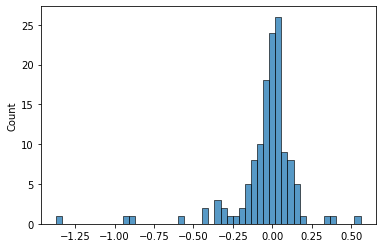

In [21]:
y_pred = RFmodel.predict(X_test)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print(f'Erro root mean squared= {rmse}')

dfTest=pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
display(dfTest)

#plt.figure(4)
#plt.title('Histograma dos resíduos em porcentagem')
sns.histplot((dfTest.y_test-dfTest.y_pred)/dfTest.y_test,bins=50)